In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('E:\\machine learning\\concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
max_thresold = df['concrete_compressive_strength'].quantile(0.99)
max_thresold

77.3

In [4]:
df[df['concrete_compressive_strength']>max_thresold]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
177,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
179,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
182,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
383,451.0,0.0,0.0,165.0,11.3,1030.0,745.0,28,78.80


In [5]:
min_thresold = df['concrete_compressive_strength'].quantile(0.01)
min_thresold

6.8858

In [6]:
df[df['concrete_compressive_strength']<min_thresold]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
605,236.0,0.0,0.0,194.0,0.0,968.0,885.0,3,6.47
651,183.9,122.6,0.0,203.5,0.0,959.2,800.0,3,4.90
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
691,212.0,141.3,0.0,203.5,0.0,973.4,750.0,3,6.81
700,133.0,200.0,0.0,192.0,0.0,927.4,839.2,3,6.88
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32
708,116.0,173.0,0.0,192.0,0.0,909.8,891.9,3,6.28
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83


In [7]:
df1=df[(df['concrete_compressive_strength']<max_thresold) & (df['concrete_compressive_strength']>min_thresold)]

In [8]:
df1.shape

(1005, 9)

In [9]:
df1.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [10]:
X=df1.drop('concrete_compressive_strength',axis=1)
y=df1['concrete_compressive_strength']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=23)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [14]:
rf.fit(X_train,Y_train)
print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))

0.9806899682134392
0.9404909850111919


In [163]:
y_pred=rf.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

16.60902097672714

# Hyperparameter tunning

In [166]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 300]}

In [167]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [168]:
rf_Grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [170]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 300}

In [171]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.4f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.4f}')

Train Accuracy - : 0.9817
Test Accuracy - : 0.9403


In [172]:
ygrid_pred=rf_Grid.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, ygrid_pred)

16.658731953756885

In [173]:
import pickle
 
pickle.dump(rf_Grid, open('rf_cement_strength.pickle', 'wb'))

In [174]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [175]:
model.score(X_train,Y_train)

0.9933841369838686

In [176]:
model.score(X_test,Y_test)

0.9477494405822926

In [177]:
ym_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, ym_pred)

14.583179331360835

In [178]:
import pickle
 
pickle.dump(model, open('xgboost_cement_strength.pickle', 'wb'))

In [68]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [69]:
grid_cv = GridSearchCV(estimator=model,
            param_grid=hyperparameter_grid,
            cv=3,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            )

In [70]:
grid_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.25, 0.5, 0.75, 1],
 

In [71]:
grid_cv.score(X_train,Y_train)

-0.3640971268834295

In [72]:
grid_cv.score(X_test,Y_test)

-2.2995283803632183

In [73]:
y_p=grid_cv.predict(X_test)

In [74]:
mean_squared_error(Y_test, y_p)

12.73093746395989

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
mean_absolute_error(Y_test, y_p)

2.2995283803632183

In [77]:
mean_absolute_error(Y_test, ym_pred)

2.660118031450497

In [78]:
mean_absolute_error(Y_test, y_pred)

3.045320112647214

In [79]:
import pickle
 
pickle.dump(grid_cv, open('cement_strength.sav', 'wb'))

In [93]:
filename='rf_cement_strength.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8929807194700293


In [94]:
y_pred_rf=loaded_model.predict(X_test)

In [96]:
y_pred_rf

array([38.06186667, 40.06506667, 31.08303333, 25.15983333, 51.49911111,
       59.07025   , 47.0453    , 36.1763    , 33.68793333, 34.23492222,
       30.41373333, 26.04243333, 53.90933254, 42.58853333, 28.03683333,
       22.1672    , 54.81126667, 27.64408   , 43.77861841, 23.68233333,
       34.23492222, 28.10973333, 50.71236667, 17.75846667, 18.77416667,
       20.93693333, 36.29866667, 30.5008    , 30.0444    , 42.0006    ,
       47.170675  , 50.9846    , 51.55038921, 39.3654746 , 22.23336667,
       28.21693333, 40.82816667, 39.58723333, 31.068     , 25.21726667,
       33.7332    , 15.50176667, 26.4356    , 38.4143    , 35.55183333,
       44.87165   , 32.64341111, 31.57283333, 52.3847    , 32.76023333,
       17.98483333, 33.61243333, 16.73526667, 50.94453333, 15.10423333,
       40.30086667, 49.05923333, 17.45786667, 29.12203333, 33.53066667,
       40.9409    , 21.78806667, 48.97173333, 36.79416667, 49.3563    ,
       37.89863333, 31.12096667, 23.4298    , 39.0927    , 58.43

In [97]:
yrf = pd.DataFrame(y_pred_rf, columns = ['Yrf_pred'])

In [98]:
yrf

,Yrf_pred
0,38.061867
1,40.065067
2,31.083033
3,25.159833
4,51.499111
...,...
181,28.518300
182,34.608122
183,36.739700
184,24.241433


In [99]:
Y_test

709    32.10
253    42.35
876    33.06
250    24.92
308    55.64
       ...  
192    27.66
70     34.40
833    36.35
240    22.32
112    56.10
Name: concrete_compressive_strength, Length: 186, dtype: float64

In [100]:
y_p

array([35.40937  , 42.82855  , 32.59916  , 25.66002  , 55.525616 ,
       61.34235  , 45.18846  , 37.402374 , 32.489697 , 34.62793  ,
       29.243063 , 32.112488 , 59.41135  , 45.870144 , 25.87166  ,
       24.072811 , 53.60119  , 20.803171 , 46.804253 , 19.37577  ,
       34.62793  , 29.336565 , 52.368626 , 17.758461 , 20.565918 ,
       17.461163 , 37.60367  , 28.599901 , 30.585274 , 42.417397 ,
       44.448616 , 53.775105 , 50.39655  , 39.11164  , 21.881023 ,
       26.119398 , 41.825306 , 42.32814  , 34.42175  , 21.6002   ,
       34.337704 , 15.489658 , 22.692686 , 40.932793 , 32.433563 ,
       41.28112  , 26.869576 , 28.234463 , 53.763275 , 32.400265 ,
       17.8907   , 30.368803 , 12.836578 , 52.3468   , 15.970646 ,
       40.304592 , 51.90878  , 19.751234 , 25.844055 , 36.12921  ,
       41.87212  , 18.838749 , 53.077343 , 37.34756  , 51.2055   ,
       40.995953 , 31.632324 , 20.742987 , 43.01688  , 58.873943 ,
       65.26892  , 31.563444 , 43.66501  , 41.314926 , 14.4827

# outlier method2

In [81]:
import numpy as np
import pandas as pd
df=pd.read_csv('E:\\machine learning\\concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [116]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

# cement

In [82]:
from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [83]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [84]:
print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<AxesSubplot:xlabel='cement'>

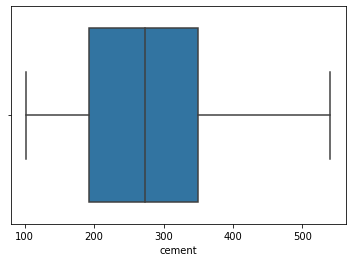

In [85]:
import seaborn as sns
sns.boxplot(x='cement',data=df, orient='h')

In [86]:
new_df_cap = df.copy()
new_df_cap['cement'] = np.where(
    new_df_cap['cement'] > U_outliers,
    U_outliers,
    np.where(
        new_df_cap['cement'] < L_outliers,
        L_outliers,
        new_df_cap['cement']
    )
)

<AxesSubplot:xlabel='cement'>

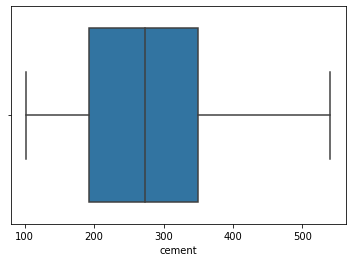

In [87]:
sns.boxplot(x='cement',data=new_df_cap, orient='h')

# Water

In [88]:
w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [89]:
WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [90]:
print('Number of outliers in water upper: ', df[df['water']>232.64999999999998]['water'].count())
print('Number of outliers in water lower: ', df[df['water']<124.25000000000001]['water'].count())


Number of outliers in water upper:  4
Number of outliers in water lower:  5


<AxesSubplot:xlabel='water'>

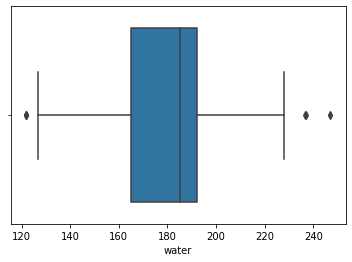

In [91]:
sns.boxplot(x='water', data=df, orient='h')

In [92]:

new_df_cap['water'] = np.where(
    new_df_cap['water'] > WU_outliers,
    WU_outliers,
    np.where(
        new_df_cap['water'] < WL_outliers,
        WL_outliers,
        new_df_cap['water']
    )
)

<AxesSubplot:xlabel='water'>

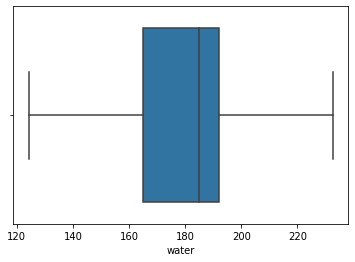

In [93]:
# sns.boxplot(x='water', data=df, orient='h')
sns.boxplot(x='water', data=new_df_cap, orient='h')

# blast_furnace_slag

In [94]:
Q1=df['blast_furnace_slag'].quantile(q=0.25)
Q3=df['blast_furnace_slag'].quantile(q=0.75)
bL_outliers=Q1-1.5*(Q3-Q1)
bU_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in water: ',bL_outliers)
print('Upper outlier in water: ',bU_outliers)

Lower outlier in water:  -214.42499999999998
Upper outlier in water:  357.375


In [95]:
print('Number of outliers in slag upper: ', df[df['blast_furnace_slag']>357.375]['blast_furnace_slag'].count())
print('Number of outliers in slag lower: ', df[df['blast_furnace_slag']<-214.425]['blast_furnace_slag'].count())

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


In [96]:
new_df_cap['blast_furnace_slag'] = np.where(
    new_df_cap['blast_furnace_slag'] > bU_outliers,
    bU_outliers,
    np.where(
        new_df_cap['blast_furnace_slag'] < bL_outliers,
        bL_outliers,
        new_df_cap['blast_furnace_slag']
    )
)

<AxesSubplot:xlabel='blast_furnace_slag'>

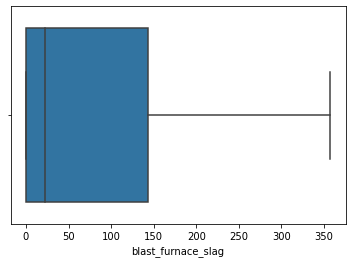

In [97]:
sns.boxplot(x='blast_furnace_slag', data=new_df_cap, orient='h')

# age

In [98]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [99]:

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [100]:
print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<AxesSubplot:xlabel='age'>

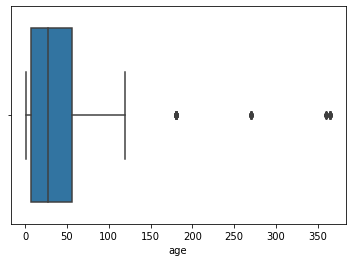

In [101]:
sns.boxplot(x='age', data=df, orient='h')

In [102]:
new_df_cap['age'] = np.where(
    new_df_cap['age'] > U_outliers,
    U_outliers,
    np.where(
        new_df_cap['age'] < L_outliers,
        L_outliers,
        new_df_cap['age']
    )
)

<AxesSubplot:xlabel='age'>

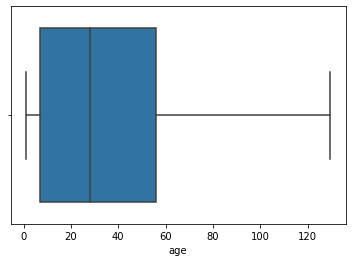

In [103]:
sns.boxplot(x='age', data=new_df_cap, orient='h')

# ASH

In [104]:
Q1=df['fly_ash'].quantile(q=0.25)
Q3=df['fly_ash'].quantile(q=0.75)

In [105]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.45
Upper outlier in ash:  295.75


In [106]:
print('Number of outliers in ash upper: ', df[df['fly_ash']>295.75]['fly_ash'].count())
print('Number of outliers in ash lower: ', df[df['fly_ash']<-177.45]['fly_ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


# superplasticizer

In [107]:
Q1=df['superplasticizer'].quantile(q=0.25)
Q3=df['superplasticizer'].quantile(q=0.75)

In [108]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -15.299999999999999
Upper outlier in ash:  25.5


In [109]:
print('Number of outliers in superplasticizer: ', df[df['superplasticizer']>25.5]['superplasticizer'].count())
print('Number of outliers in superplasticizer: ', df[df['superplasticizer']<-15.3]['superplasticizer'].count())

Number of outliers in superplasticizer:  10
Number of outliers in superplasticizer:  0


In [110]:
new_df_cap['superplasticizer'] = np.where(
    new_df_cap['superplasticizer'] > U_outliers,
    U_outliers,
    np.where(
        new_df_cap['superplasticizer'] < L_outliers,
        L_outliers,
        new_df_cap['superplasticizer']
    )
)

<AxesSubplot:xlabel='superplasticizer'>

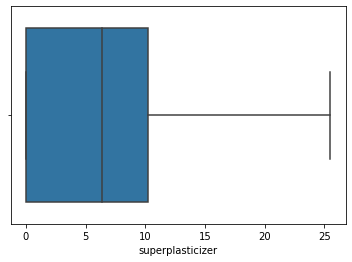

In [111]:
sns.boxplot(x='superplasticizer', data=new_df_cap, orient='h')

# coarse_aggregate

In [112]:
Q1=df['coarse_aggregate'].quantile(q=0.25)
Q3=df['coarse_aggregate'].quantile(q=0.75)

In [113]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  785.8999999999999
Upper outlier in ash:  1175.5000000000002


In [114]:
print('Number of outliers in coarse_aggregate: ', df[df['coarse_aggregate']>1175.5]['coarse_aggregate'].count())
print('Number of outliers in coarse_aggregate: ', df[df['coarse_aggregate']<785.9]['coarse_aggregate'].count())

Number of outliers in coarse_aggregate:  0
Number of outliers in coarse_aggregate:  0


# fine_aggregate

In [117]:
Q1=df['fine_aggregate '].quantile(q=0.25)
Q3=df['fine_aggregate '].quantile(q=0.75)

In [118]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  591.3750000000001
Upper outlier in ash:  963.5749999999999


In [120]:
print('Number of outliers in fine_aggregate : ', df[df['fine_aggregate ']>963.575]['fine_aggregate '].count())
print('Number of outliers in fine_aggregate : ', df[df['fine_aggregate ']<591.375]['fine_aggregate '].count())

Number of outliers in fine_aggregate :  5
Number of outliers in fine_aggregate :  0


In [121]:
new_df_cap['fine_aggregate '] = np.where(
    new_df_cap['fine_aggregate '] > U_outliers,
    U_outliers,
    np.where(
        new_df_cap['fine_aggregate '] < L_outliers,
        L_outliers,
        new_df_cap['fine_aggregate ']
    )
)

<AxesSubplot:xlabel='fine_aggregate '>

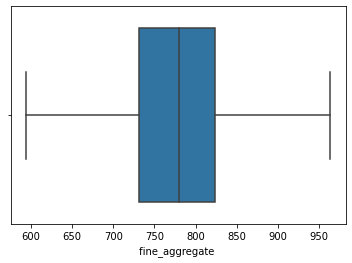

In [122]:
sns.boxplot(x='fine_aggregate ', data=new_df_cap, orient='h')

# concrete_compressive_strength

In [123]:
Q1=df['concrete_compressive_strength'].quantile(q=0.25)
Q3=df['concrete_compressive_strength'].quantile(q=0.75)

In [124]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -9.927500000000002
Upper outlier in ash:  79.77250000000001


In [125]:
print('Number of outliers in concrete_compressive_strength : ', df[df['concrete_compressive_strength']>79.77]['concrete_compressive_strength'].count())
print('Number of outliers in concrete_compressive_strength : ', df[df['concrete_compressive_strength']<-9.927]['concrete_compressive_strength'].count())

Number of outliers in concrete_compressive_strength :  4
Number of outliers in concrete_compressive_strength :  0


In [126]:
new_df_cap['concrete_compressive_strength'] = np.where(
    new_df_cap['concrete_compressive_strength'] > U_outliers,
    U_outliers,
    np.where(
        new_df_cap['concrete_compressive_strength'] < L_outliers,
        L_outliers,
        new_df_cap['concrete_compressive_strength']
    )
)

<AxesSubplot:xlabel='concrete_compressive_strength'>

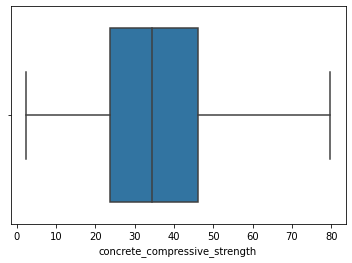

In [127]:
sns.boxplot(x='concrete_compressive_strength', data=new_df_cap, orient='h')

In [128]:
new_df_cap.shape

(1030, 9)

In [129]:
X=new_df_cap.drop('concrete_compressive_strength',axis=1)
y=new_df_cap['concrete_compressive_strength']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=23)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [133]:
rf.fit(X_train,Y_train)
print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))

0.9839643517702749
0.8984810293847029


In [134]:
y_pred=rf.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

29.96266700265131

In [142]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10,15, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 300]}

In [143]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [144]:
rf_Grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [145]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100}

In [146]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.4f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.4f}')

Train Accuracy - : 0.9840
Test Accuracy - : 0.8985


In [147]:
ygrid_pred=rf_Grid.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, ygrid_pred)

29.96266700265131

In [148]:
ygrid_pred

array([35.9042    , 10.1189    , 66.4025    , 13.6364    , 18.1095    ,
       49.048125  , 11.2047    , 68.828625  , 49.0801    , 18.4774    ,
       36.14761667, 29.6739    , 67.7519    , 31.8486    , 47.89016667,
       10.9298    , 33.4215    , 63.01765357, 34.87195   , 41.222675  ,
       32.8127    , 36.6968    , 32.6621    , 21.0819    , 30.0066    ,
       60.656125  , 23.2545    , 60.7034    , 38.9373    , 26.8355    ,
       40.1401    , 15.4348    , 61.6181    , 50.534925  , 27.4585    ,
       13.572     , 39.3896    , 30.7676    ,  7.5065    , 23.9589    ,
       63.3656    , 23.8473    , 40.9709    , 43.91686667, 12.3049    ,
       32.7575    , 13.4404    , 42.09863333, 37.7892    , 35.5665    ,
       35.3619    , 28.0283    , 41.02693333, 38.22174667, 29.9669    ,
       41.176     , 19.3698    , 37.7936    , 31.0618    , 32.6985    ,
       32.0069    , 40.57506667, 38.5759    , 31.6783    , 57.62175   ,
       50.82775143, 38.22174667, 28.69919667, 60.4199    , 15.92